## Laboratorium 4 - Regularyzacja

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, classification_report

### Regularyzacja dla regresji liniowej

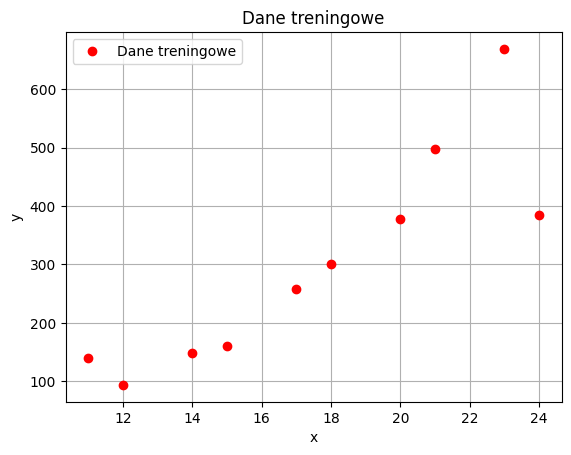

In [76]:
with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    x_train_data = [row for row in csvreader]
    x_train_data = np.array(x_train_data, dtype=np.float32)

plt.plot(x_train_data[:,0], x_train_data[:,1], 'ro', label='Dane treningowe')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Dane treningowe')
plt.grid()
plt.show()

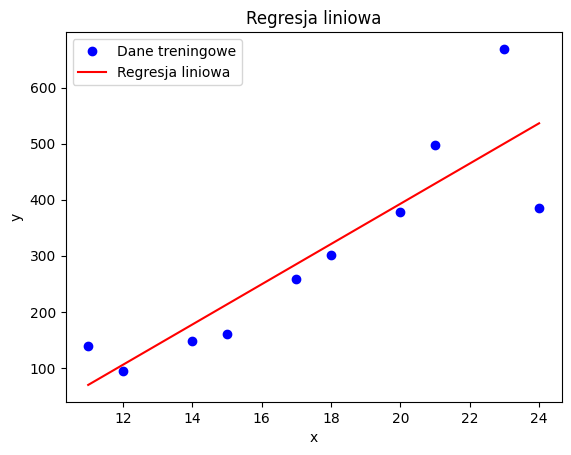

In [77]:
# Przygotowanie danych
x_train = x_train_data[:, 0].reshape(-1, 1)
y_train = x_train_data[:, 1]

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(x_train, y_train)

# Przewidywanie wartości
y_pred = model.predict(x_train)

# Wykres danych treningowych i linii regresji
plt.plot(x_train, y_train, 'bo', label='Dane treningowe')
plt.plot(x_train, y_pred, '-r', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa')
plt.legend()
plt.show()


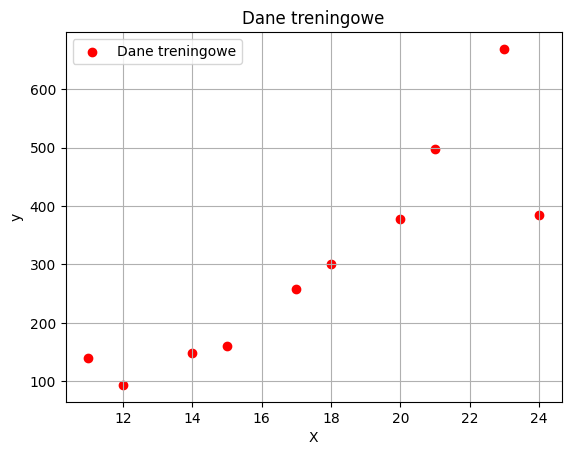

In [78]:
x_train = x_train_data[:, 0].reshape(-1, 1)
y_train = x_train_data[:, 1].reshape(-1, 1)

# Wizualizacja punktów pomiarowych
plt.scatter(x_train, y_train, color='red', label='Dane treningowe')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dane treningowe')
plt.legend()
plt.grid()
plt.show()

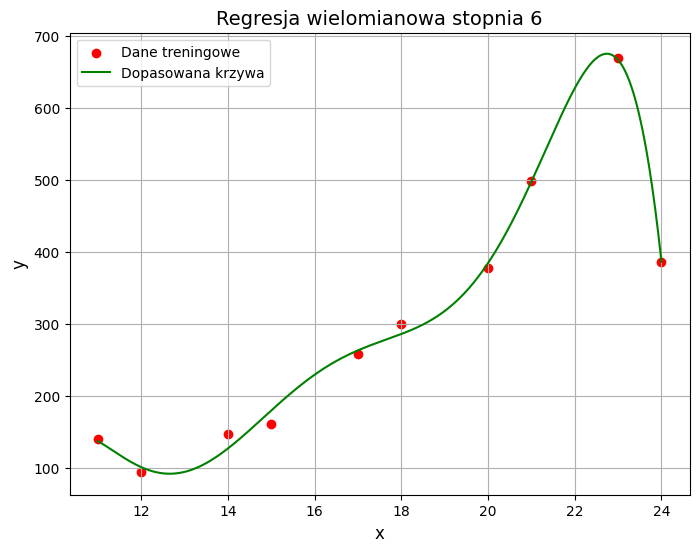

Wartość funkcji kosztu (MSE): 114.6177520752


In [79]:
# Skalowanie danych
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

# Rozszerzenie cech do postaci wielomianowej (stopień 6)
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x_scaled)

# Dopasowanie modelu regresji liniowej
reg = LinearRegression()
reg.fit(x_poly, y_train)

# Predykcja dla wykresu regresji
x_reg = np.linspace(x_train.min(), x_train.max(), 1000).reshape(-1, 1)
x_reg_scaled = scaler.transform(x_reg)
x_reg_poly = poly.transform(x_reg_scaled)
y_reg = reg.predict(x_reg_poly)

# Wizualizacja – rysowanie punktów danych i dopasowanej krzywej
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='red', label='Dane treningowe')
plt.plot(x_reg.flatten(), y_reg.flatten(), color='green', label='Dopasowana krzywa')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresja wielomianowa stopnia 6', fontsize=14)
plt.legend(fontsize=10)
plt.grid()
plt.show()

y_pred = reg.predict(x_poly)
mse = mean_squared_error(y_train, y_pred)
print(f'Wartość funkcji kosztu (MSE): {mse:.10f}')

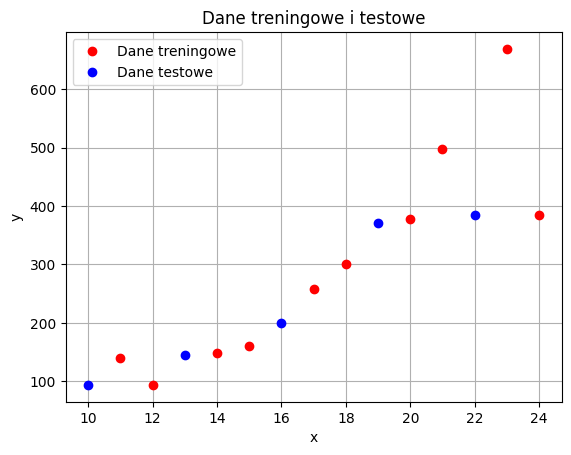

In [80]:
with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    x_test_data = [row for row in csvreader]
    x_test_data = np.array(x_test_data, dtype=np.float32)

plt.plot(x_train, y_train, 'ro', label='Dane treningowe')
plt.plot(x_test_data[:,0], x_test_data[:,1], 'bo', label='Dane testowe')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Dane treningowe i testowe')
plt.grid()
plt.show()

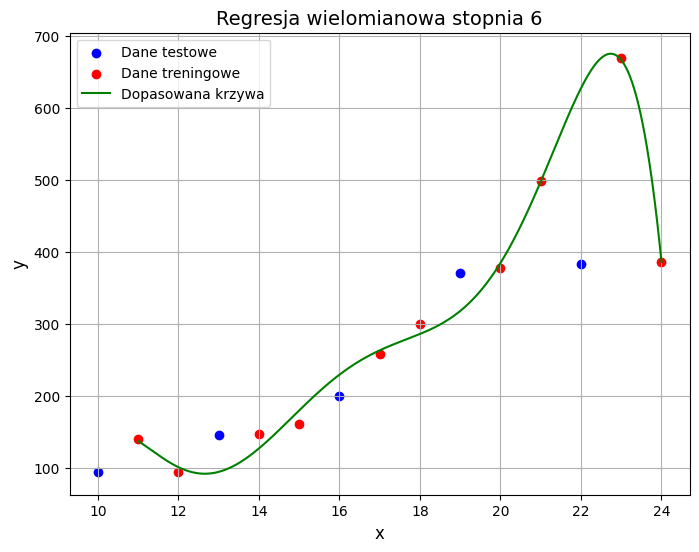

Wartość funkcji kosztu (MSE): 0.0000000018


In [81]:
x_test = x_test_data[:, 0].reshape(-1, 1)
y_test = x_test_data[:, 1]

# Skalowanie danych testowych
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

# Rozszerzenie cech do postaci wielomianowej (stopień 6)
poly = PolynomialFeatures(degree=6)
x_test_poly = poly.fit_transform(x_test_scaled)

# Dopasowanie modelu regresji liniowej wyłącznie na danych testowych
reg = LinearRegression()
reg.fit(x_test_poly, y_test)

# Wizualizacja – rysowanie punktów danych i dopasowanej krzywej
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Dane testowe')
plt.scatter(x_train, y_train, color='red', label='Dane treningowe')
plt.plot(x_reg.flatten(), y_reg.flatten(), color='green', label='Dopasowana krzywa')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresja wielomianowa stopnia 6', fontsize=14)
plt.legend(fontsize=10)
plt.grid()
plt.show()

y_pred = reg.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'Wartość funkcji kosztu (MSE): {mse:.10f}')

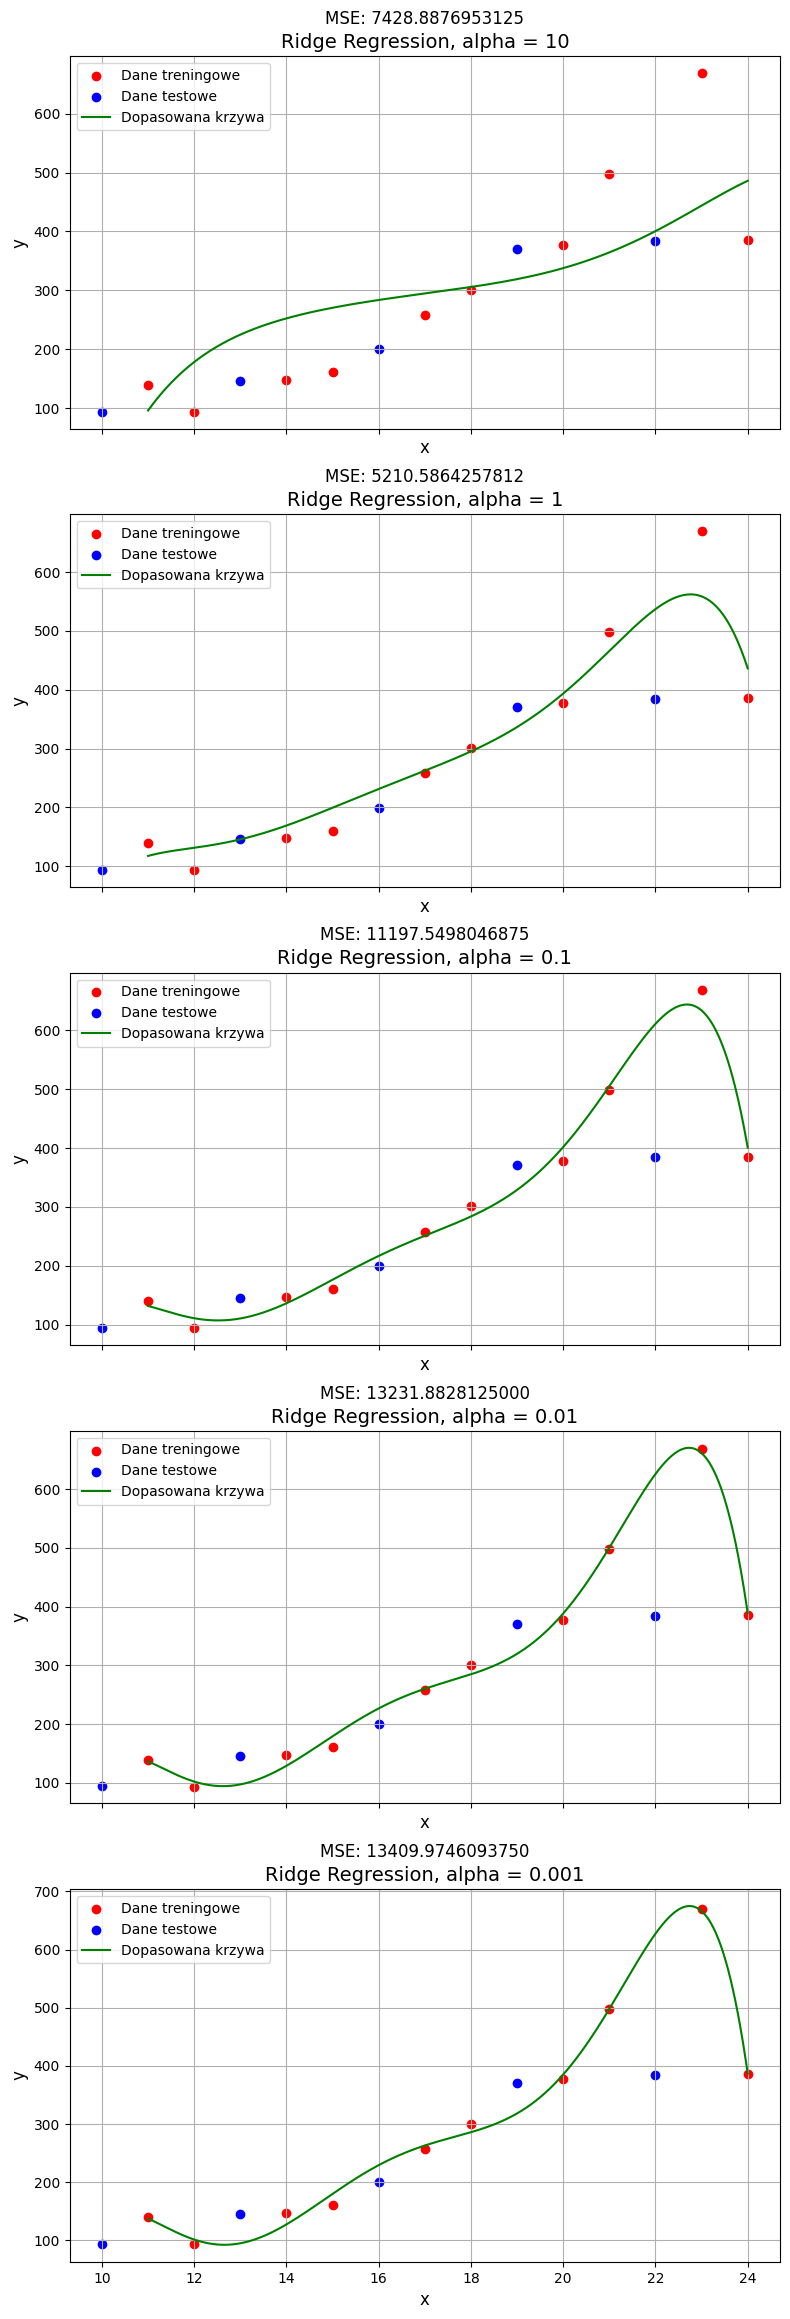

Koszty (MSE) dla poszczególnych alpha:
alpha = 10: MSE = 7428.8876953125
alpha = 1: MSE = 5210.5864257812
alpha = 0.1: MSE = 11197.5498046875
alpha = 0.01: MSE = 13231.8828125000
alpha = 0.001: MSE = 13409.9746093750


In [ ]:
# Lista wartości lambda (w Ridge parametr alpha odpowiada lambda)
lambdas = [10, 1, 0.1, 0.01, 0.001]
costs = {}
n = len(lambdas)

# Ustawiamy układ wykresów jeden pod drugim
fig, axes = plt.subplots(n, 1, figsize=(8, n * 5), sharex=True)

# Jeśli mamy tylko jeden przypadek, upewnij się, że axes jest listą:
if n == 1:
    axes = [axes]

# Dla każdego alpha wykonujemy:
for i, alpha in enumerate(lambdas):
    # 1. Skalowanie danych treningowych i testowych
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # 2. Rozszerzenie cech do postaci wielomianowej (stopień 6)
    poly = PolynomialFeatures(degree=6)
    x_train_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)
    
    # 3. Dopasowanie modelu Ridge z regularyzacją (alpha odpowiada lambda)
    model = Ridge(alpha=alpha)
    model.fit(x_train_poly, y_train)
    
    # Predykcja na zbiorze testowym i obliczenie kosztu (MSE)
    y_test_pred = model.predict(x_test_poly)
    cost = mean_squared_error(y_test, y_test_pred)
    costs[alpha] = cost
    
    # 4. Przygotowanie zakresu x do wizualizacji dopasowanej krzywej
    x_reg = np.linspace(x_train.min(), x_train.max(), 1000).reshape(-1, 1)
    x_reg_scaled = scaler.transform(x_reg)
    x_reg_poly = poly.transform(x_reg_scaled)
    y_reg = model.predict(x_reg_poly)
    
    # 5. Wizualizacja
    ax = axes[i]
    ax.scatter(x_train, y_train, color='red', label='Dane treningowe')
    ax.scatter(x_test, y_test, color='blue', label='Dane testowe')
    ax.plot(x_reg.flatten(), y_reg.flatten(), color='green', label='Dopasowana krzywa')
    ax.set_title(f'Ridge Regression, alpha = {alpha}', fontsize=14)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True)
    ax.legend(fontsize=10)
    
    # Dodanie adnotacji z wartością MSE nad wykresem
    ax.text(0.5, 1.1, f'MSE: {cost:.10f}', transform=ax.transAxes,
            fontsize=12, ha='center', va='center')

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()

# Wyświetlenie kosztów w konsoli
print("Koszty (MSE) dla poszczególnych alpha:")
for alpha, cost in costs.items():
    print(f"alpha = {alpha}: MSE = {cost:.10f}")

### Regularyzacja dla regresji logistycznej

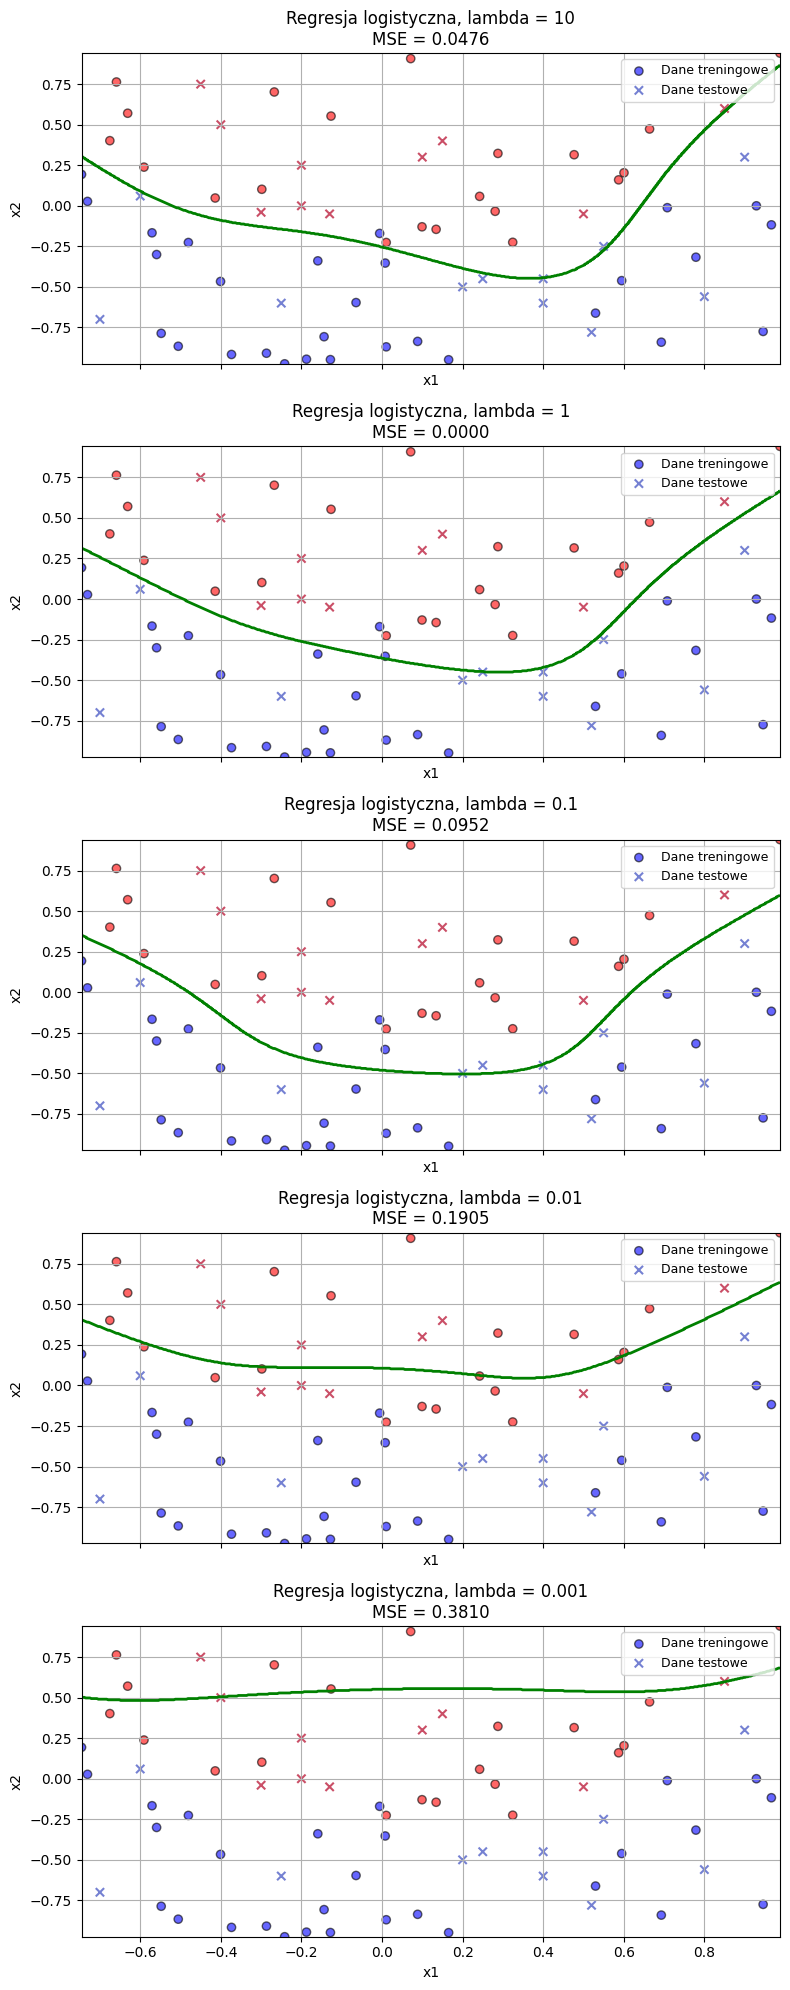

Funkcja kosztu (MSE) dla poszczególnych wartości C:
C = 10 -> MSE = 0.0476
C = 1 -> MSE = 0.0000
C = 0.1 -> MSE = 0.0952
C = 0.01 -> MSE = 0.1905
C = 0.001 -> MSE = 0.3810


In [5]:
with open('./logi_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    train_rows = [row for row in csvreader]
    train_data = np.array(train_rows, dtype=np.float32)

with open('./logi_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    test_rows = [row for row in csvreader]
    test_data = np.array(test_rows, dtype=np.float32)

x1_train = train_data[:, 0].reshape(-1, 1)
x2_train = train_data[:, 1].reshape(-1, 1)
y_train = train_data[:, 2].reshape(-1, 1)

x1_test = test_data[:, 0].reshape(-1, 1)
x2_test = test_data[:, 1].reshape(-1, 1)
y_test = test_data[:, 2].reshape(-1, 1)

# Łączymy cechy w jedną macierz, gdzie każdy wiersz to przykład z dwiema cechami
X_train = np.concatenate([x1_train, x2_train], axis=1)
X_test = np.concatenate([x1_test, x2_test], axis=1)

degree = 6
lambdas = [10, 1, 0.1, 0.01, 0.001]

costs = {}

number_of_models = len(lambdas)

fig, axes = plt.subplots(number_of_models, 1, figsize=(8, number_of_models * 4), sharex=True, sharey=True)

if number_of_models == 1:
    axes = [axes]


for idx, reg_val in enumerate(lambdas):
    # Skalowanie danych – uczymy scaler na danych treningowych, następnie transformujemy dane treningowe i testowe
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Rozszerzenie cech do postaci wielomianowej
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_poly = poly_transformer.fit_transform(X_train_scaled)
    X_test_poly = poly_transformer.transform(X_test_scaled)
    
    # Trenowanie modelu regresji logistycznej z regularyzacją L2
    # W modelu LogisticRegression parametr C odpowiada odwrotności siły regularyzacji.
    model = LogisticRegression(penalty='l2', C=reg_val, solver='lbfgs', max_iter=1000)
    model.fit(X_train_poly, y_train.ravel())
    
    # Predykcja na zbiorze testowym oraz obliczenie funkcji kosztu (MSE)
    y_test_pred = model.predict(X_test_poly)
    mse_cost = mean_squared_error(y_test, y_test_pred)
    costs[reg_val] = mse_cost
    
    # Przygotowanie siatki punktów do wizualizacji granicy decyzyjnej
    x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()
    x2_min, x2_max = X_train[:, 1].min(), X_train[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                         np.linspace(x2_min, x2_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid_points)
    grid_poly = poly_transformer.transform(grid_scaled)
    grid_pred = model.predict(grid_poly)
    grid_pred = grid_pred.reshape(xx.shape)
    
    # Wizualizacja
    current_ax = axes[idx]
    current_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), cmap='bwr',
                       alpha=0.6, edgecolors='k', label='Dane treningowe')
    current_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), cmap='coolwarm',
                       marker='x', alpha=0.7, label='Dane testowe')
    # Rysowanie granicy decyzyjnej
    current_ax.contour(xx, yy, grid_pred, levels=[0.5], linewidths=2, colors='green')
    current_ax.set_title(f"Regresja logistyczna, lambda = {reg_val}\nMSE = {mse_cost:.4f}", fontsize=12)
    current_ax.set_xlabel("x1", fontsize=10)
    current_ax.set_ylabel("x2", fontsize=10)
    current_ax.grid(True)
    current_ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("Funkcja kosztu (MSE) dla poszczególnych wartości C:")
for reg_val, cost in costs.items():
    print(f"C = {reg_val} -> MSE = {cost:.4f}")


In [16]:
data = load_iris()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
print(f'Funkcja kosztu (log loss) dla danych treningowych: {cost_train:}')
print(f'Funkcja kosztu (log loss) dla danych testowych: {cost_test:}')
print(classification_report(y_test, y_test_pred))

Funkcja kosztu (log loss) dla danych treningowych: 0.04550645668061371
Funkcja kosztu (log loss) dla danych testowych: 0.04103018425074127
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test) 

log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)

y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
print(f'Funkcja kosztu (log loss) dla danych treningowych: {cost_train:}')
print(f'Funkcja kosztu (log loss) dla danych testowych: {cost_test:}')
print(classification_report(y_test, y_test_pred))

Funkcja kosztu (log loss) dla danych treningowych: 0.0003284258925079253
Funkcja kosztu (log loss) dla danych testowych: 1.0816320462824658
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [19]:
lambda_ = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test) 

log_regr = LogisticRegression(penalty='l2', C=1/lambda_)
log_regr.fit(x_train, y_train)

y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
print(f'Funkcja kosztu (log loss) dla danych treningowych: {cost_train:}')
print(f'Funkcja kosztu (log loss) dla danych testowych: {cost_test:}')
print(classification_report(y_test, y_test_pred))

Funkcja kosztu (log loss) dla danych treningowych: 0.04648312608670245
Funkcja kosztu (log loss) dla danych testowych: 0.061694283707472035
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
